In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [3]:
df = pd.read_csv('../(Data) Last Year/training/prices_round_1_day_0.csv', delimiter=';')
df.fillna(0, inplace=True)

In [4]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,PEARLS,9998,1,9995.0,30.0,0.0,0.0,10005,30,0.0,0.0,0.0,0.0,10001.5,0.0
1,0,0,BANANAS,4893,1,4892.0,30.0,0.0,0.0,4899,30,0.0,0.0,0.0,0.0,4896.0,0.0
2,0,100,PEARLS,9996,1,9995.0,30.0,0.0,0.0,10002,6,10004.0,1.0,10005.0,30.0,9999.0,2.0
3,0,100,BANANAS,4892,31,0.0,0.0,0.0,0.0,4896,7,4898.0,31.0,0.0,0.0,4894.0,0.0
4,0,200,PEARLS,9996,1,9995.0,21.0,0.0,0.0,10004,1,10005.0,21.0,0.0,0.0,10000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,BANANAS,4875,1,4870.0,2.0,4869.0,24.0,4876,26,0.0,0.0,0.0,0.0,4875.5,123508.0
19996,0,999800,PEARLS,9995,27,0.0,0.0,0.0,0.0,10005,27,0.0,0.0,0.0,0.0,10000.0,-408.0
19997,0,999800,BANANAS,4869,27,0.0,0.0,0.0,0.0,4876,27,0.0,0.0,0.0,0.0,4872.5,123648.0
19998,0,999900,PEARLS,9996,2,9995.0,21.0,0.0,0.0,10004,2,10005.0,21.0,0.0,0.0,10000.0,-408.0


Text(0, 0.5, 'Mid Price')

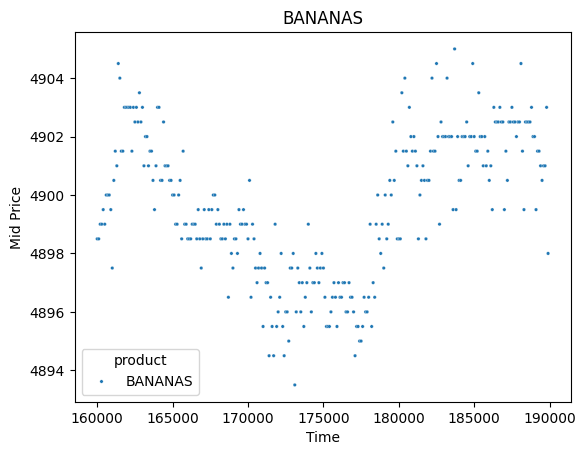

In [9]:
sns.scatterplot(data=df[df['product'] == 'BANANAS'].iloc[1600:1900], x='timestamp', y='mid_price', hue='product', s = 6)
plt.title('BANANAS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [ ]:
def find_average(row):
    try:
        return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
    row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
    row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                    row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])
    except:
        return 0

df['avg_price'] = df.apply(find_average, axis=1)

In [ ]:
# calculate lin reg of 40 points

# we want to check if our prediction of the timestamp in 10 mins time is 
def check